# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import citipy

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")



Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):   
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=imperial"
    print(city_url)
    
    #city_url = url + "&q=" + city
    #print(city_url)
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        print(response)
        print(city)
        if response.status_code == 200:
            city_weather = response.json()
            print(city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
       
       
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })
       

    #If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
https://api.openweathermap.org/data/2.5/weather?appid=c9125e5029737a5a2d19cc94a794d718&q=grytviken&units=imperial
Processing Record 1 of Set 1 | grytviken
<Response [200]>
grytviken
{'coord': {'lon': -36.5092, 'lat': -54.2811}, 'weather': [{'id': 601, 'main': 'Snow', 'description': 'snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 28.67, 'feels_like': 19.44, 'temp_min': 28.67, 'temp_max': 28.67, 'pressure': 1000, 'humidity': 91, 'sea_level': 1000, 'grnd_level': 996}, 'visibility': 1001, 'wind': {'speed': 10.29, 'deg': 261, 'gust': 14.03}, 'snow': {'1h': 0.89}, 'clouds': {'all': 31}, 'dt': 1691550844, 'sys': {'country': 'GS', 'sunrise': 1691575120, 'sunset': 1691607876}, 'timezone': -7200, 'id': 3426466, 'name': 'Grytviken', 'cod': 200}
https://api.openweathermap.org/data/2.5/weather?appid=c9125e5029737a5a2d19cc94a794d718&q=kaa-khem&units=imperial
Processing Record 2 of Set 1 | kaa-khem
<Response [200]>
kaa-khem
{'c

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          598
Lat           598
Lng           598
Max Temp      598
Humidity      598
Cloudiness    598
Wind Speed    598
Country       598
Date          598
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,28.67,91,31,10.29,GS,1691550844
1,kaa-khem,51.6833,94.7333,66.83,78,100,0.87,RU,1691550844
2,weno,7.4515,151.8468,85.95,79,100,8.05,FM,1691550845
3,puerto natales,-51.7236,-72.4875,36.07,95,100,4.27,CL,1691550637
4,bhawanigarh,30.2667,76.0350,86.11,68,100,7.02,IN,1691550845


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,28.67,91,31,10.29,GS,1691550844
1,kaa-khem,51.6833,94.7333,66.83,78,100,0.87,RU,1691550844
2,weno,7.4515,151.8468,85.95,79,100,8.05,FM,1691550845
3,puerto natales,-51.7236,-72.4875,36.07,95,100,4.27,CL,1691550637
4,bhawanigarh,30.2667,76.0350,86.11,68,100,7.02,IN,1691550845


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

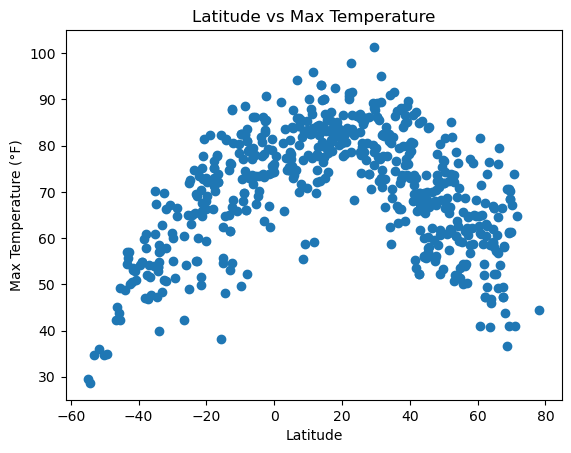

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
plt.title('Latitude vs Max Temperature')

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

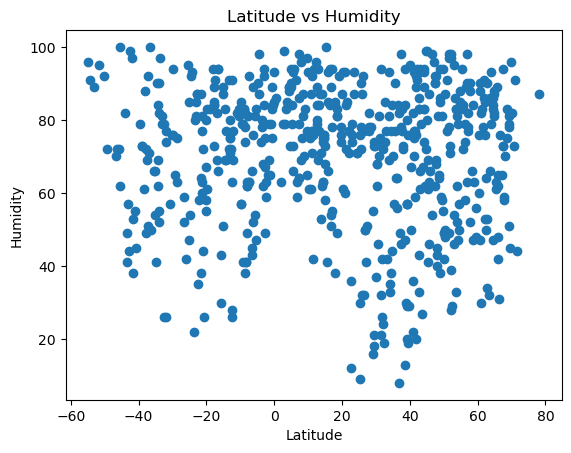

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs Humidity')


# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

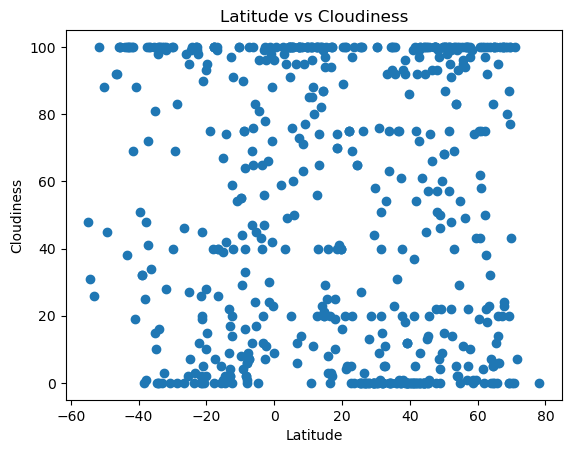

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs Cloudiness')

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

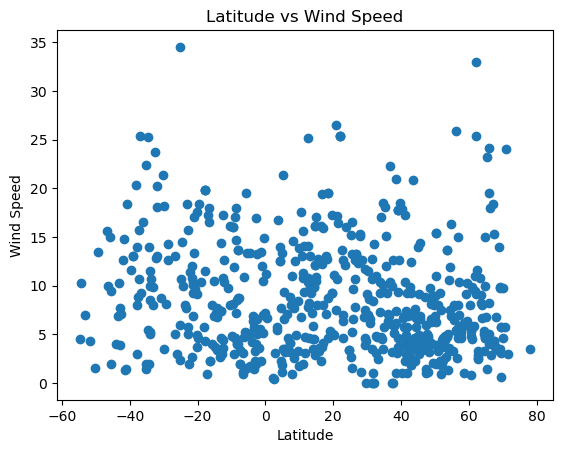

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs Wind Speed')

# Save the figure
plt.savefig("Fig4.png")
# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [30]:
# Define a function to create Linear Regression plots
import seaborn as sns
import matplotlib.pyplot as plt

def linear_regression_plot(x_data, y_data, x_label, y_label, title):
    sns.set(style="whitegrid")  # Set the style of the plot
    plt.figure(figsize=(8, 6))  # Set the size of the plot
    
    # Create a linear regression plot
    reg_plot = sns.regplot(x=x_data, y=y_data, scatter_kws={'s': 30}, line_kws={'color': 'red'})
    
    # Compute and display R value
    r_value = np.corrcoef(x_data, y_data)[0, 1]
    r_text = f'R = {r_value:.2f}'
    plt.text(0.05, 0.95, r_text, transform=reg_plot.transAxes, fontsize=12)
    print(f"The r-value is: {r_value}")
    
    # Set labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Display regression line equation
    slope, intercept = np.polyfit(x_data, y_data, 1)
    line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.text(0.05, 0.88, line_eq, transform=reg_plot.transAxes, fontsize=12)
    
    plt.show()



In [31]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kaa-khem,51.6833,94.7333,66.83,78,100,0.87,RU,1691550844
2,weno,7.4515,151.8468,85.95,79,100,8.05,FM,1691550845
4,bhawanigarh,30.2667,76.0350,86.11,68,100,7.02,IN,1691550845
5,cargados carajos,30.2667,76.0350,86.11,68,100,7.02,IN,1691550845
7,bilibino,68.0546,166.4372,43.74,70,100,6.80,RU,1691550845


In [32]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,28.67,91,31,10.29,GS,1691550844
3,puerto natales,-51.7236,-72.4875,36.07,95,100,4.27,CL,1691550637
6,port-aux-francais,-49.3500,70.2167,34.97,72,45,13.42,TF,1691550845
10,ambilobe,-13.2000,49.0500,65.01,91,22,3.00,MG,1691550846
11,avarua,-21.2078,-159.7750,75.25,60,20,10.36,CK,1691550728


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6642141580563915


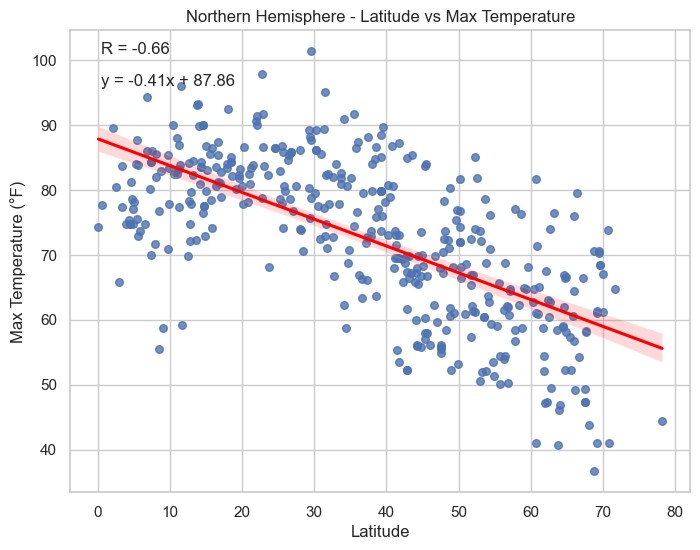

In [33]:
# Linear regression on Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Latitude', 'Max Temperature (°F)', 'Northern Hemisphere - Latitude vs Max Temperature')

The r-value is: 0.7789902627228766


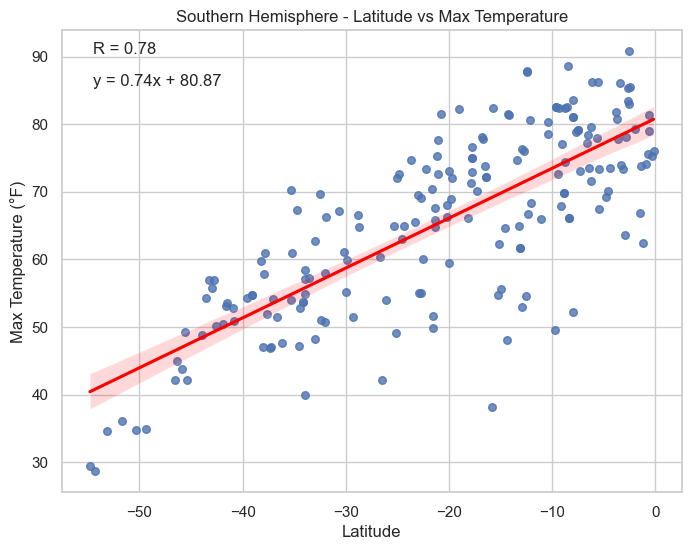

In [34]:
# Linear regression on Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Max Temperature (°F)', 'Southern Hemisphere - Latitude vs Max Temperature')

**Discussion about the linear relationship:** The relationship between latitude and maximum temperature seems to have a moderate negative linear correlation in the northern hemisphere, and a stronger positive linear correlation in the southern hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.09844854646976542


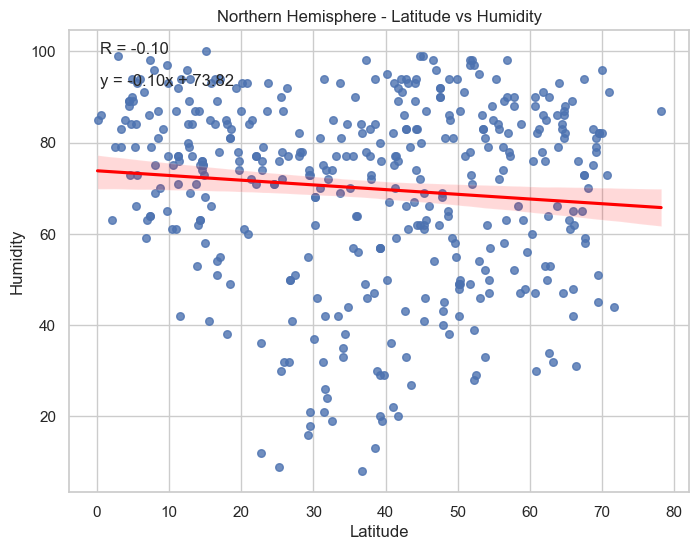

In [35]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Humidity', 'Northern Hemisphere - Latitude vs Humidity')

The r-value is: 0.009192565320311461


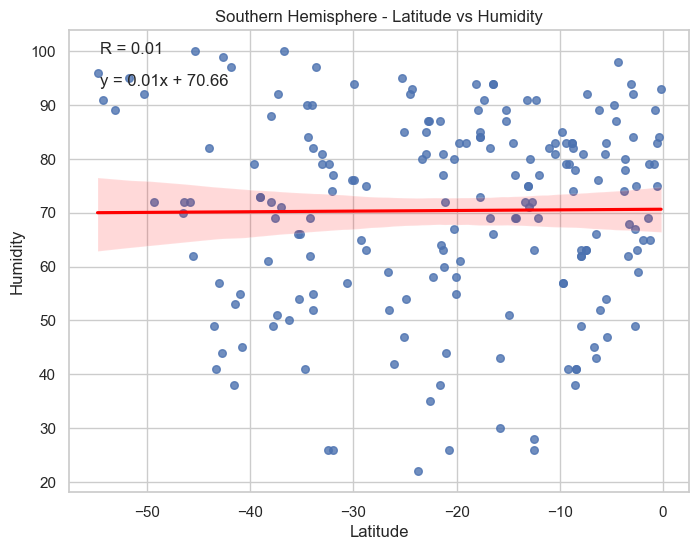

In [36]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Humidity', 'Southern Hemisphere - Latitude vs Humidity')

**Discussion about the linear relationship:** There appears to be no strong linear correlation between latitude and humidity in both the northern and southern hemispheres. The data seems to be scattered in no particular pattern.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.09360843623657467


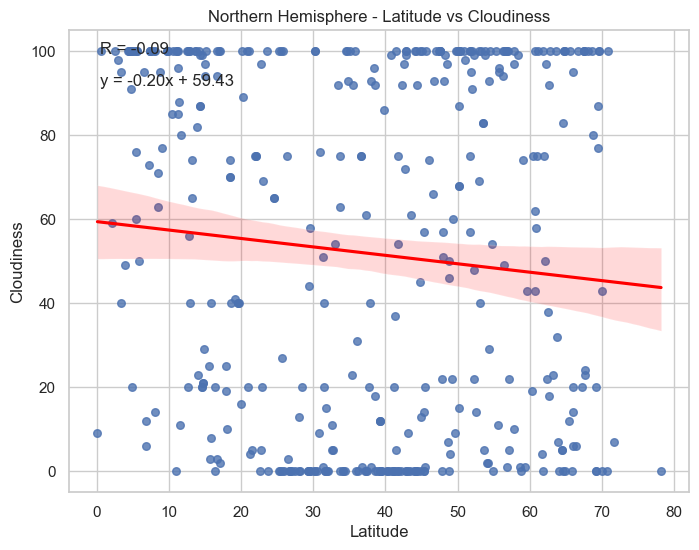

In [37]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness', 'Northern Hemisphere - Latitude vs Cloudiness')

The r-value is: -0.18387075975223874


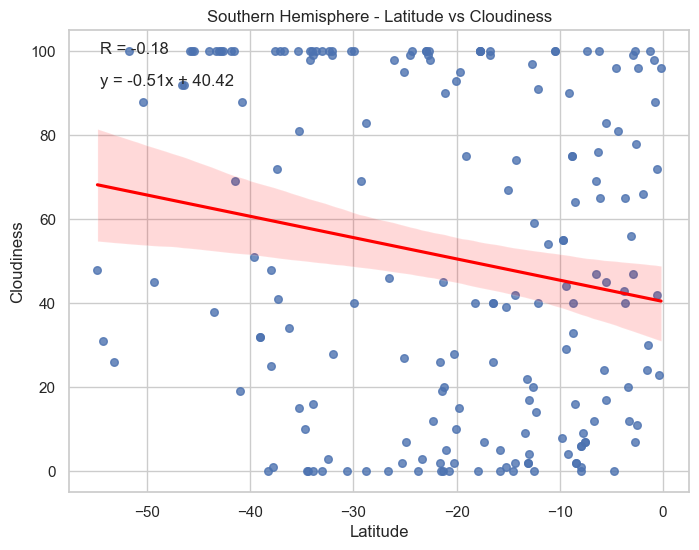

In [38]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness', 'Southern Hemisphere - Latitude vs Cloudiness')

**Discussion about the linear relationship:** There appears to be no strong linear correlation between latitude and cloudiness in both the northern and southern hemispheres. The data seems to be scattered in no particular pattern.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.11021979984708047


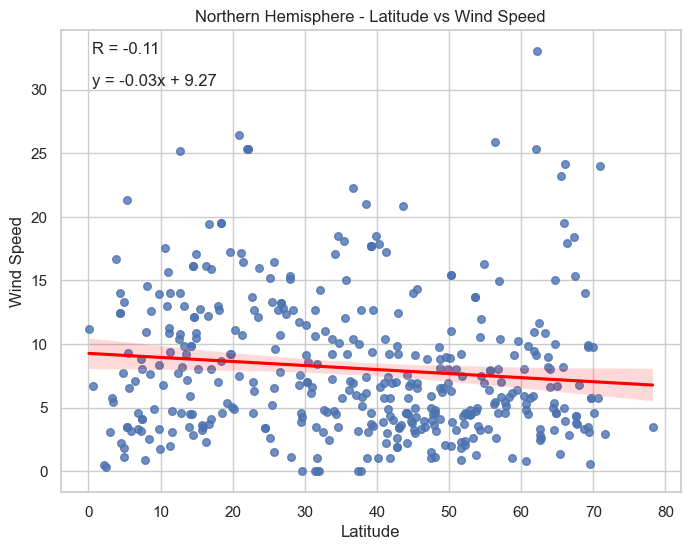

In [39]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed', 'Northern Hemisphere - Latitude vs Wind Speed')

The r-value is: -0.17187682832837092


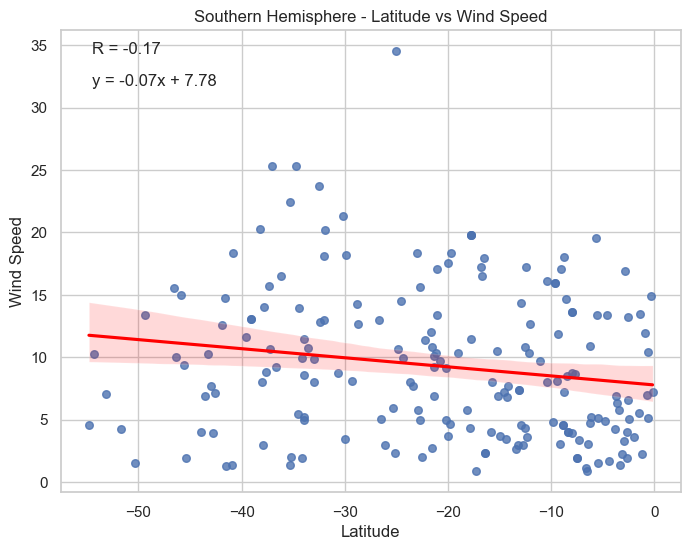

In [40]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed', 'Southern Hemisphere - Latitude vs Wind Speed')

**Discussion about the linear relationship:** There appears to be no strong linear correlation between latitude and wind speed in both the northern and southern hemispheres. The data seems to be scattered in no particular pattern.